In [20]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lime

In [21]:
pic_name = "img/2"
pic = cv2.imread(pic_name + ".jpg")

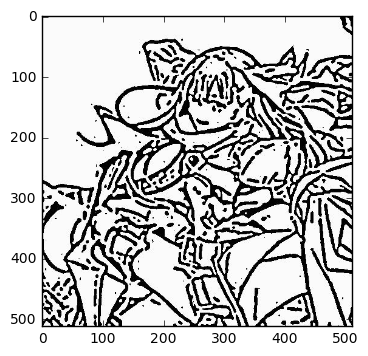

In [37]:
from PIL import Image, ImageEnhance
from pylab import *
#import numpy as np
from scipy.ndimage import filters
#from skimage import io
import glob, os

Gamma = 0.99
Phi = 200
Epsilon = 0.1
k = 2.5
Sigma = 1.5

im = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(im, -1, kernel)
im2 = filters.gaussian_filter(im, Sigma)
im3 = filters.gaussian_filter(im, Sigma* k)
differencedIm2 = im2 - (Gamma * im3)
(x, y) = shape(im2)
for i in range(x):
    for j in range(y):
        if differencedIm2[i, j] < Epsilon:
            differencedIm2[i, j] = 1
        else:
            differencedIm2[i, j] = 250 + tanh(Phi * (differencedIm2[i, j]))


gray_pic=differencedIm2.astype(np.uint8)
final_img = Image.fromarray( gray_pic)
final_img.save('test.jpg')
pic = cv2.imread("test.jpg")
plt.imshow(pic)

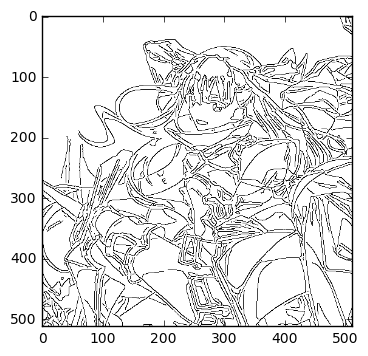

In [3]:
pic_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(pic, (7,7), 0), cv2.COLOR_BGR2GRAY)
pic_edges = cv2.bitwise_not(cv2.Canny(pic_preprocessed, threshold1=10, threshold2=60))
plt.imshow(cv2.cvtColor(pic_edges, cv2.COLOR_GRAY2RGB))


In [22]:
cv2.imwrite(pic_name + "_edges0.jpg", pic_edges)

True

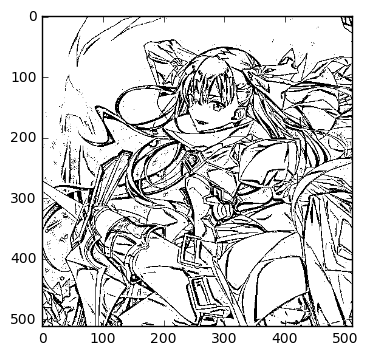

In [39]:
# Plan to use this as our edge detection algorithm
img = cv2.imread(pic_name  + ".jpg",0)

img_edge = cv2.adaptiveThreshold(img,255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=11,
                                 C=2)


plt.imshow(img_edge,cmap = 'gray')

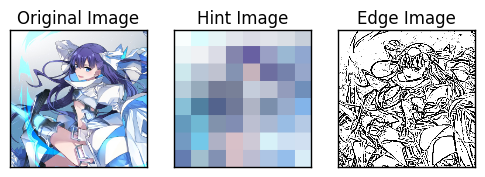

In [40]:
# What's used in DeepColor
cimg = cv2.imread(pic_name + ".jpg", 1)
cimg = np.fliplr(cimg.reshape(-1,3)).reshape(cimg.shape)
cimg = cv2.resize(cimg, (256,256))

img = cv2.imread(pic_name  + ".jpg",0)

# kernel = np.ones((5,5),np.float32)/25
seg = np.ones_like(cimg)

num_segs = 8
seg_len = 256/num_segs

for x in xrange(num_segs):
    for y in xrange(num_segs):
        seg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 0] = np.average(cimg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 0])
        seg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 1] = np.average(cimg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 1])
        seg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 2] = np.average(cimg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 2])


# img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_edge = cv2.adaptiveThreshold(img, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)

# img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
# img_cartoon = cv2.bitwise_and(img, img_edge)

plt.subplot(131),plt.imshow(cimg)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(seg)
plt.title('Hint Image'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(img_edge,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.imshow(img_edge,cmap = 'gray')

In [34]:
cv2.imwrite(pic_name + "_edges1.jpg", img_edge)

True